<a href="https://colab.research.google.com/github/lohithganni/Expense-Tracker/blob/main/22EC30020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def DFS_iterative(x, y, count, labels_map, visited, instance_map):
    """
    Perform iterative depth-first search to label connected components.

    Args:
    x, y: Starting pixel coordinates.
    count: Current label for connected component.
    labels_map: 2D numpy array containing labels.
    visited: 2D numpy array to keep track of visited pixels.
    instance_map: 2D numpy array to store the result.
    """
    # Direction vectors for traversing neighbors (8 directions)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    # stack is initialized with starting pixel
    stack = [(x, y)]
    visited[x, y] = True  # starting pixel marked as visited
    instance_map[x, y] = count

    while stack:
        current_x, current_y = stack.pop()

        for dx, dy in directions:
            new_x, new_y = current_x + dx, current_y + dy

            # Check if the new position is within bounds, not visited, and has the same label
            if 0 <= new_x < labels_map.shape[0] and 0 <= new_y < labels_map.shape[1]:
                if not visited[new_x, new_y] and labels_map[new_x, new_y] == labels_map[current_x, current_y]:
                    visited[new_x, new_y] = True
                    instance_map[new_x, new_y] = count
                    stack.append((new_x, new_y))

In [11]:
# This is a helpful
def color_and_save_map(instance_map=None,
                       file_name = "Instance_map.png"):
    """Relabels a instance map from 0 to unique labels.

    Args:
    instance_map: A 2-D NumPy array representing the instance map.

    Returns:
    A 3D NumPy array of shape [H,W,C] representing the RGB relabeled instance map.
    """
    assert instance_map.ndim == 2, "Instance map must be a 2-D array."
    assert instance_map.dtype == np.uint8, "Instance map must be a 8-bit unsigned integer array."

    # Create a dictionary to map old labels to new labels
    label_map = {}
    new_label = 0


    # Get unique labels and store it in array unique_labels
    unique_labels = np.sort(np.unique(instance_map))

    total_labels = len(unique_labels)

    # Iterate through the unique labels and re-map them to range 0,1,2...,total_labels-1
    for i in range(total_labels):
        label = unique_labels[i]
        if label not in label_map:
            label_map[label] = i

    # Relabel the semantic map using the created dictionary
    relabeled_map = np.vectorize(lambda x: label_map[x])(instance_map)

    # relabeled_map = np.stack((relabeled_map, relabeled_map, relabeled_map), axis=2)

    relabeled_map = relabeled_map*(255//len(unique_labels))

    relabeled_map = relabeled_map.astype(instance_map.dtype)

    # Convert relabeled map to RGB colored Image
    relabeled_map_color = cv2.applyColorMap(relabeled_map.reshape((relabeled_map.shape[0], relabeled_map.shape[1], 1)),
                                            cv2.COLORMAP_JET).astype(np.uint8)

    # Set label 0 to [0,0,0] color
    relabeled_map_color[relabeled_map==0,:] = 0

    #save image
    cv2.imwrite(file_name , relabeled_map_color)


    return relabeled_map_color


Sematic map is as follows:


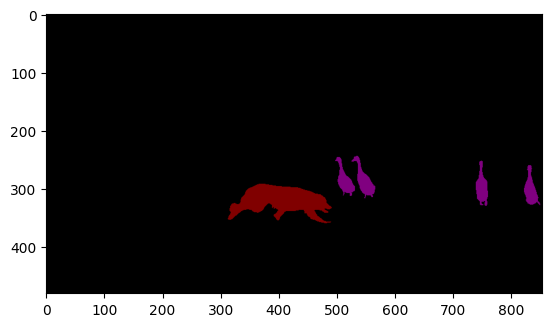

Instance map is as follows:


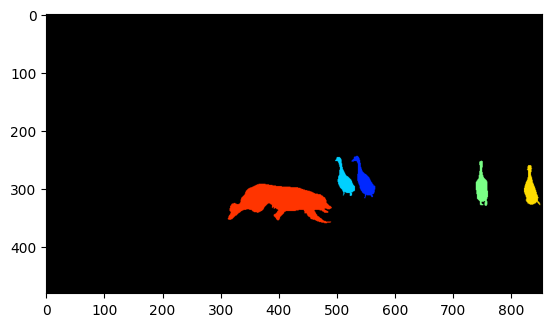

In [18]:
# upload 00039_Semantic.png image from dog-goose to Colab
# path to image
semantic_map_path = "./00039_Semantic.png"

# load image to a numpy array [Height, Width, Channels]
semantic_map = cv2.imread(semantic_map_path)



print("Sematic map is as follows:")
# plot image
#   - Convert from BGR to RGB for displaying
plt.imshow(semantic_map[:,:,::-1])
plt.show()


# semnatic map array is of shape [H,W,C], where C = 3 = RGB channels
H,W,C = semantic_map.shape

# Create a numpy array of all zeros , of same shape as
instance_map = np.zeros((H,W), dtype = np.uint8)

# create labels map by averaging Blue,Green and Red pixel values
labels_map = (semantic_map[:,:,0]/3.0 + semantic_map[:,:,1]/3.0 + semantic_map[:,:,2]/3.0)
labels_map = labels_map.astype(np.uint8)

# Your code to compute Instance map, save it in variable instance_map

visited = np.full((H, W), False, dtype=bool)
instance_map = np.zeros((H, W), dtype=np.uint8)
count = 1


for i in range(H):
    for j in range(W):
        if labels_map[i, j] != 0 and not visited[i, j]:
            DFS_iterative(i, j, count, labels_map, visited, instance_map)
            count += 1

# End of the code


# For now we are going to plot and write the label_map
# for presentation purposes. But you code will

instance_map_color = color_and_save_map(instance_map=instance_map,
                                        file_name = "Instance_map.png")




print("Instance map is as follows:")
# plot image
#   - Convert from BGR to RGB for displaying
plt.imshow(instance_map_color[:,:,::-1])


